In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import scipy.stats as st

In [3]:
housing = pd.read_csv("C:\\Users\\Administrator\OneDrive\Documents\I am paving my way to a data job\Week 7/train.csv")
housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**1. Pemusatan & penyebaran harga rumah**

In [4]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Berdasarkan survei terhadap 1460 rumah, ditemukan bahwa harga rumah bervariasi dari USD 34,900-755,000. Dalam persebaran harga rumah yang berat ke kiri (negatively skewed), terlihat bahwa 75% rumah terjual/dinilai dengan harga USD 214,000 atau lebih rendah; hanya sedikit yang terjual dengan harga maksimal USD 755,000. Rata-rata rumah dihargai di angka USD 180,921 +_ 79,442.

**2. Pemusatan & penyebaran harga rumah per tahun**

In [64]:
def q1(housing):
    return housing.quantile(0.25)

def q3(housing):
    return housing.quantile(0.75)

In [6]:
aggregate = {'SalePrice' : ['mean', 'median', q1, q3, 'std']}

summary = housing.groupby('YrSold').agg(aggregate).reset_index()
summary

YrSold      SalePrice                                            
                   mean    median        q1        q3           std
0   2006  182549.458599  163995.0  131375.0  218782.5  79426.838855
1   2007  186063.151976  167000.0  129900.0  219500.0  85768.171410
2   2008  177360.838816  164000.0  131250.0  207000.0  69735.610685
3   2009  179432.103550  162000.0  125250.0  212750.0  80879.237311
4   2010  177393.674286  155000.0  128100.0  213250.0  80451.280085

Harga rumah bersifat fluktuatif, dengan nilai tertinggi di tahun 2007 (avg: USD 186,063 +_ 85,768) dan terendah di tahun setelahnya (avg: USD 177,360 +_ 69,735). 75% rumah yang terdata dihargai sampai USD 200,000-220,000 dan tidak banyak yang mencapai harga di atas rata-rata per tahun.

**3. Tren harga rumah**

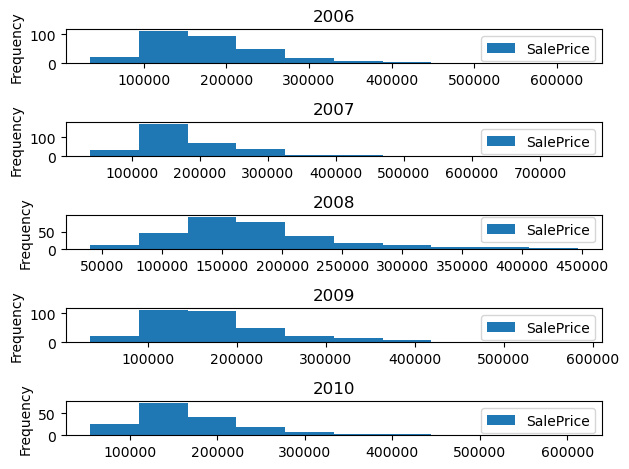

In [61]:
ax = housing.plot.hist(column = ['SalePrice'], by='YrSold')
pt.tight_layout()

Dalam tahun 2006-2010, sebagian besar rumah terjual dengan harga sekitar USD 100,000-200,000. Perbedaan paling tampak pada tahun 2008 di mana sebagian besar rumah terjual dengan harga USD 125,000-200,000, harga tertinggi tidak sampai USD 450,000, dan terdapat jumlah signifikan dari rumah yang terjual di bawah USD 50,000.

In [66]:
data_mean = housing.groupby('YrSold').agg({'SalePrice' : ['mean', 'median', q1, q3]}).reset_index()
data_mean.columns = ['Year', 'Mean', 'Median', 'Q1', 'Q3']
data_mean

,Year,Mean,Median,Q1,Q3
0,2006,182549.458599,163995.0,131375.0,218782.5
1,2007,186063.151976,167000.0,129900.0,219500.0
2,2008,177360.838816,164000.0,131250.0,207000.0
3,2009,179432.103550,162000.0,125250.0,212750.0
4,2010,177393.674286,155000.0,128100.0,213250.0


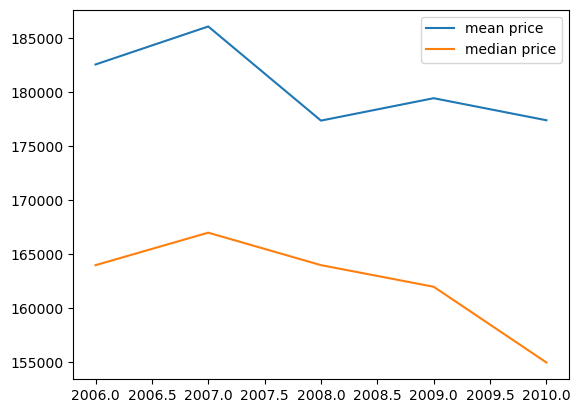

In [28]:
pt.plot(data_mean['Year'], data_mean['Mean'], label = 'mean price')
pt.plot(data_mean['Year'], data_mean['Median'], label = 'median price')
pt.legend()
pt.show()

Secara teori, median lebih sesuai untuk analisis pola data mengingat distribusi data yang berat ke kiri. Akan tetapi, perubahan harga rumah per tahun secara luas lebih terepresentasi dalam grafik rataan, sehingga dalam situasi ini nilai rata-rata lebih cocok ditampilkan. 

**4. Uji hipotesis**

H0: harga rumah tidak naik setiap tahun | H1: harga rumah naik setiap tahun

In [69]:
data_mean = housing.groupby('YrSold').agg({'SalePrice':['mean']}).reset_index()
data_mean

,YrSold,SalePrice
,,mean
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


Dinilai dari rata-rata saja, harga rumah belum tentu naik setiap tahun. Untuk data kontinu dengan distribusi non-normal seperti dataset housing ini, statistical significance dari kenaikan harga akan diuji dengan one-way ANOVA.

In [70]:
yr6 = housing[housing['YrSold'] == 2006]
yr7 = housing[housing['YrSold'] == 2007]
yr8 = housing[housing['YrSold'] == 2008]
yr9 = housing[housing['YrSold'] == 2009]
yr10 = housing[housing['YrSold'] == 2010]
ftest = st.f_oneway(yr6['SalePrice'], yr7['SalePrice'], yr8['SalePrice'], yr9['SalePrice'], yr10['SalePrice'])

p_value = ftest.pvalue
alpha = 0.05
print('P-Value:', p_value)

P-Value: 0.6300887663573457


Dengan p-value > alpha, dapat disimpulkan bahwa harga rumah relatif stabil dari tahun ke tahun (H0 diterima).

**5. A/B testing**

Nama eksperimen: AB Testing Signifikansi Campaign pada Minat Pembukaan Deposito

H0: Jumlah campaign tidak memengaruhi keinginan nasabah membuka rekening deposito
<br>
H1: Jumlah campaign memengaruhi keinginan nasabah membuka rekening deposito
<br>
<br>
Variabel: jumlah campaign yang dikeluarkan
<br>
Metric utama: jumlah pembukaan rekening depo

In [22]:
bank = pd.read_csv("C:\\Users\Administrator\\OneDrive\Documents\I am paving my way to a data job\Week 7/bank-full.csv", engine = 'python', sep=None)

open_depo_acc = bank[bank['y'] == 'yes']
no_depo_acc = bank[bank['y'] == 'no']

In [49]:
import math
N = bank.shape[0]
e = 0.05
slovin = N/(1+N*e**2)
samplesize = int(round(slovin, -1))
print('Minimal jumlah sampel/grup: ', samplesize)

Minimal jumlah sampel/grup:  400


In [50]:
#append 2 sample sizes
open_depo_sample = open_depo_acc.sample(n=samplesize, random_state=22)
no_depo_sample = no_depo_acc.sample(n=samplesize, random_state=22)

testdata = pd.concat([open_depo_sample, no_depo_sample], axis=0).reset_index(drop=True)
testdata['y'].value_counts()

yes    400
no     400
Name: y, dtype: int64

In [78]:
depo = testdata.groupby('y').agg({'campaign':['sum', 'mean']}).reset_index()
depo.columns = ['deposit acc', 'campaign_sum', 'campaign_per_ppl']
depo

,deposit acc,campaign_sum,campaign_per_ppl
0,no,1114,2.7850
1,yes,795,1.9875


Dari angka saja, terlihat bahwa kelompok yang memutuskan membuka rekening deposito menerima lebih sedikit campaign per orang. Akan tetapi signifikansi jumlah campaign perlu dibuktikan lebih lanjut dengan uji statistik menggunakan independent samples T-test.

In [90]:
import statsmodels.stats.proportion as sp
import scipy as scipy
from scipy.stats import ttest_ind

ttest_ind(open_depo_sample['campaign'], no_depo_sample['campaign'])

Ttest_indResult(statistic=-15.599948860003783, pvalue=1.0123473642096295e-54)

Dengan nilai p-value > 0.05, dapat disimpulkan bahwa jumlah campaign tidak memiliki pengaruh signifikan pada keputusan nasabah membuka rekening deposito.